<!-- <table>
  <tr>
    <td><img src="https://raw.githubusercontent.com/DrPBaksh/image_processing/main/logos/logo_2.png?raw=true" alt="Corndel" width="301.5" height="216"></td>
    <td><img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width="301.5" height="216"></td>
  </tr>
</table> -->


<img src="https://raw.githubusercontent.com/DrPBaksh/image_processing/main/logos/logo_2.png?raw=true" alt="Corndel" width ="301.5" height=216>

<!-- <img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width ="301.5" height=216> -->

# Time Series Forecasting 3 : Answers 

This notebook is a brief version of the main time series forecasting 3 notebook with gaps to fill out in order to apply time series forecasting to some new datasets



In [1]:

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics import tsaplots 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn import metrics
import numpy as np

from scipy import stats
import seaborn as sns

C:\Users\PeterBaksh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PeterBaksh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\PeterBaksh\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\PeterBaksh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div class="alert alert-block alert-warning">
<b>Question </b>
Read in the data for the file , data_month. I have hosted it on my github so you need to paste in the following link in as a string and it will pull the csv from there. 
    
"https://github.com/DrPBaksh/workshop-data/blob/main/data_month.csv?raw=true" 
<br>
</div>

In [2]:
df = pd.read_csv("https://github.com/DrPBaksh/workshop-data/blob/main/data_month.csv?raw=true" )
df.head()

Date  Fremont Bridge Total
0  2012-10-01               65695.0
1  2012-11-01               50647.0
2  2012-12-01               36369.0
3  2013-01-01               44884.0
4  2013-02-01               50027.0

**Both ETS and Arima in Python require that the datetime component is in the index of the dataframe**

<div class="alert alert-block alert-warning">
<b>Question </b>
Change the Date column to be a pandas datetime datatype. After that set the index as the Date. Rember to use the inplace argument to overwrite the df
<br>
</div>

In [3]:
df.Date = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

<div class="alert alert-block alert-warning">
<b>Question </b>
View the data. Insert the correct string into y
<br>
</div>

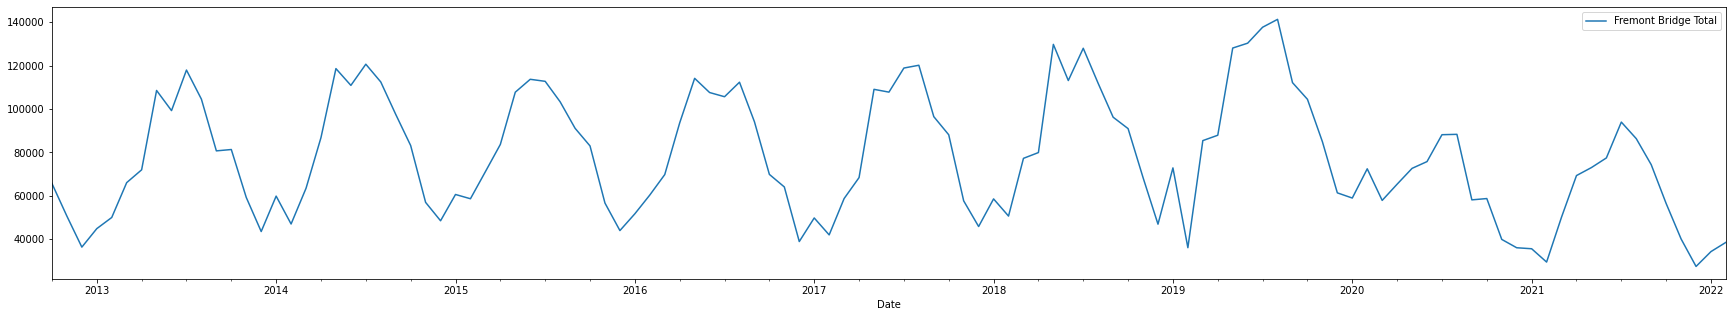

In [4]:
df.plot(y = 'Fremont Bridge Total')
fig = plt.gcf()
fig.set_size_inches(30, 5)

**Set the frequency of the dataframe. Remember if this errors it indicates you have an incomplete time series**

<div class="alert alert-block alert-warning">
<b>Question </b>
From viewing the data earlier set the correct frequency for the index 
<br>
</div>

In [5]:
df.index.freq = 'MS'

**Split the data into Training and Testing sets**

In time series we do this by time and not by random samples. 

<div class="alert alert-block alert-warning">
<b>Question </b>
We want the training data to include everything up to and including the year 2020. We want the training data to be everything from 2021 onwards
<br>
</div>

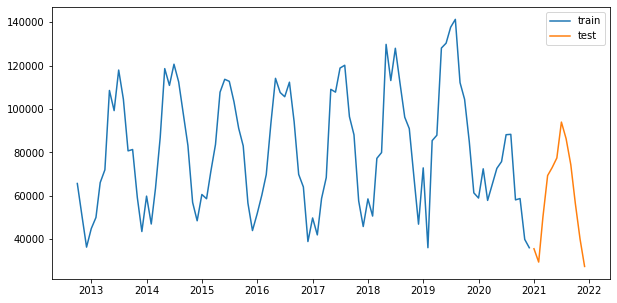

In [6]:
train = df.loc[:'2020']
test = df.loc['2021']
fig = plt.figure(figsize = (10, 5))
plt.plot(train.index, train.values)
plt.plot(test.index, test.values)
plt.legend(['train', 'test'])

**Apply Seasonal Decomposition on your data - Remember look at the residual to see if there is any structure left in your data. If there is try a different model or it could be there is a further seasonality**

<div class="alert alert-block alert-warning">
<b>Question </b>
Lets have a quick look at the seasonal decomposition. Remember to pass in the correct column of the data frame. Either use a mul or add model. Evaluate which is most appropriate 
<br>
</div>

In [7]:
decomp=seasonal_decompose(train['Fremont Bridge Total'],model='mul')

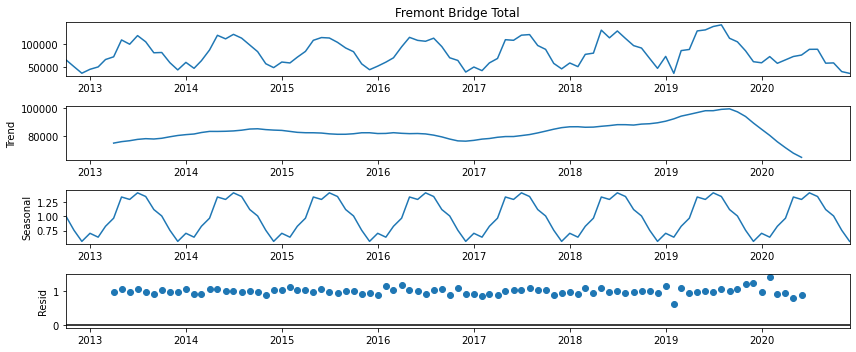

In [8]:
fig = decomp.plot()
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show();

## Identifying the Period of Seasonality

**ACF and PCF**

Now that we have the trend identified in the data we can removed the trend to obtan infomation on seasonal features. Both the ACF and PCF can show this 

The Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) are tools used in time series analysis to identify the underlying structure of the data. Both are used to determine the degree of correlation between a time series and its past values. The ACF measures the correlation between a time series and its lagged values, while the PACF measures the correlation between a time series and its lagged values after accounting for the effect of all the intermediate lags. In other words, the PACF shows the direct effect of each lag on the current value, while the ACF shows the cumulative effect of all lags up to that point.

Another way of looking at this is the ACF takes the data at a lag time t and plots that against itself.

However the pcf will perform a regression in time where it looks to see how well data at t = 0 correlates with t = t including all the points between t = 0 and t = t. It therefore can be more sensitive to the specific correlation after a number of lags

<div class="alert alert-block alert-warning">
<b>Question </b>
Create a dataframe called detrended. The columns will be date taken from the index of the training data and the values will be a list called detrended taken from the decomp of the observed values and the trend values. Set the index as date. Drop the null values afterwards and view the plot
<br>
</div>

In [9]:
detrended = pd.DataFrame({'date' : train.index, 'detrended': decomp.observed.values -decomp.trend.values}).set_index('date')
detrended = detrended.dropna()

C:\Users\PeterBaksh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


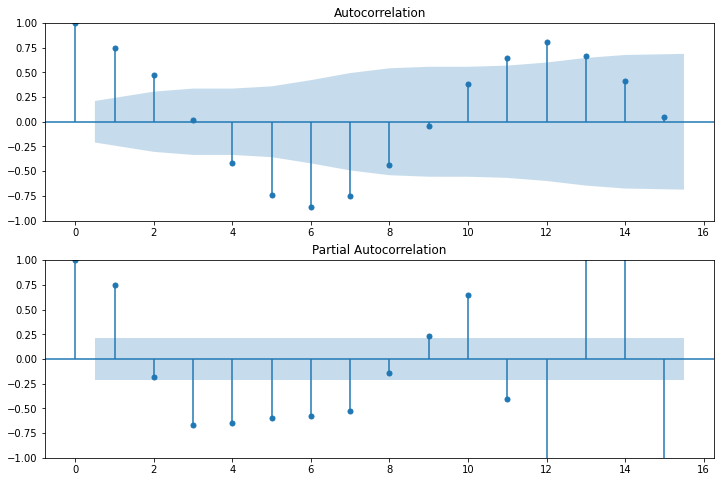

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(detrended, ax=ax1, lags=15)
plot_pacf(detrended, ax=ax2, lags=15)
plt.show()

**For now we shall just look at the ACF that shows a period of 12 lags.  Lets now plot the ETS model remebering that after a grid search from the previous workshop we found the Error was mul, the Trend was add and the seasonal mul. We are going to be working with a variety of models so we shall create a dataframe to store out results so we can make quantitive comparision. Below we have some code that will calculate varipus metrics on our training and testing data and provide a results dataframe.**


In [11]:
def update_results(model_name, data_name, results, train, train_fit, test, test_forecast):
    try:
        res = {}
        res['train_rmse'] = [np.sqrt(np.mean((train.values - train_fit.values)**2)).round(2)]
        res['test_rmse'] = [np.sqrt(np.mean((test.values - test_forecast.values)**2)).round(2)]
        res['train_mape'] = [100*metrics.mean_absolute_percentage_error(train, train_fit).round(2)]
        res['test_mape'] = [100*metrics.mean_absolute_percentage_error(test, test_forecast).round(2)]
        res['train_r2'] = [metrics.r2_score(train, train_fit).round(2)]
        res['test_r2'] = [metrics.r2_score(test, test_forecast).round(2)]
        res['model'] = [model_name]
        res['data'] = [data_name]
        results = pd.concat([results, pd.DataFrame(res)])
    except:
        res['train_rmse'] = [np.sqrt(np.mean((train.values - train_fit)**2)).round(2)]
        res['test_rmse'] = [np.sqrt(np.mean((test.values - test_forecast)**2)).round(2)]
        res['train_mape'] = [100*metrics.mean_absolute_percentage_error(train, train_fit).round(2)]
        res['test_mape'] = [100*metrics.mean_absolute_percentage_error(test, test_forecast).round(2)]
        res['train_r2'] = [metrics.r2_score(train, train_fit).round(2)]
        res['test_r2'] = [metrics.r2_score(test, test_forecast).round(2)]
        res['model'] = [model_name]
        res['data'] = [data_name]
        results = pd.concat([results, pd.DataFrame(res)])
        
    return results

results = pd.DataFrame(columns = ['model', 'data', 'train_rmse', 'train_mape', 'train_r2', 'test_rmse', 'test_mape', 'test_r2'])
results

Empty DataFrame
Columns: [model, data, train_rmse, train_mape, train_r2, test_rmse, test_mape, test_r2]
Index: []

**Create ets model to make predictions on airline passenger data**

<div class="alert alert-block alert-warning">
<b>Question </b>
Below we are training an ETS model. From the previous workshop you can take the best params for this dataset, or use the ones I have. Set the correct number of periods
<br>
</div>

In [12]:
model= sm.tsa.ETSModel(train['Fremont Bridge Total'].astype('float64'),
                                error='mul',          # CHANGE THIS TO BE add or mul          
                                trend='mul',          # CHANGE THIS TO BE add or mul
                                damped_trend=True,   # CHANGE THIS TO BE True or False
                                seasonal='mul',       # CHANGE THIS TO BE add or mul
                                seasonal_periods=12,
                                freq='MS').fit()

**Take time to understand the next block of code because we repeat this numerous times**

- trian_fit_ets is the fitted values of the algorithm over the training data
- train_forecast_ets is the models forecast into the future beyond the training data. We are going to forecast data the length of the testing data
- the update results function takes the orignal data, train and test in this case the the fitted results and the forecast results and it calculates the RMSE, MAPE and R2 for this model

<div class="alert alert-block alert-warning">
<b>Question </b>
Adjust the code below so that the first argument to update results is a description of the model that has been trained, e.g ETS and the second is a description of the data we trained it on
<br>
</div>

In [13]:
train_fit_ets = model.fittedvalues
test_forecast_ets = model.forecast(steps = len(test))
results = update_results('ets', 'bridge',results, train, train_fit_ets, test, test_forecast_ets)
results

model    data train_rmse train_mape train_r2 test_rmse test_mape test_r2
0   ets  bridge    37695.5        9.0     0.89  28320.61      12.0     0.9

<div class="alert alert-block alert-warning">
<b>Question </b>
View the forecast. Ensure you select the correct column to view the forecast with 
<br>
</div>

**We now have our first result. Lets visualise what is going on in the forecast**

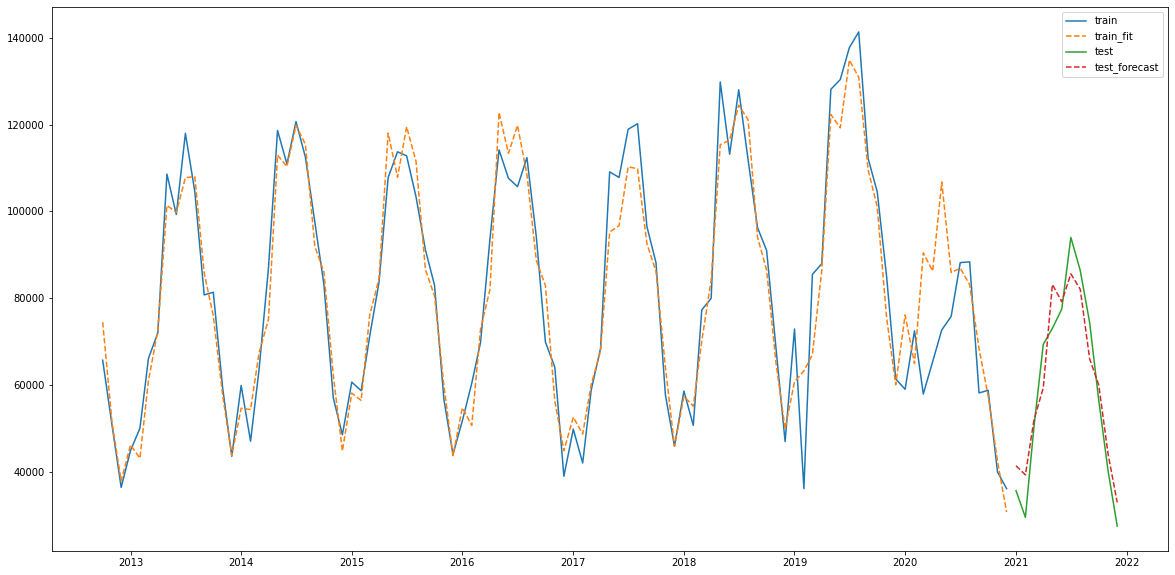

In [14]:
plt.plot(train.index, train['Fremont Bridge Total'])
plt.plot(train.index, train_fit_ets, '--')
plt.plot(test.index, test['Fremont Bridge Total'])
plt.plot(test.index, test_forecast_ets, '--')
plt.legend(['train', 'train_fit', 'test', 'test_forecast'])
fig = plt.gcf()
fig.set_size_inches(20, 10)

## ARMA ARIMA SARIMA SARIMAMAX

We shall now look to use one of the ARIMA models to make a forecast on this data. There are numerous ARIMA models we can use. I have notebooks that go through each of them however we shall look at where each model shall be used

- ARMA: Autoregressive Moving Average. It is a model that uses a combination of autoregressive (AR) and moving average (MA) terms to explain the behavior of a time series. Data most be stationary
- ARIMA: Autoregressive Integrated Moving Average. It is a model that extends ARMA by incorporating the concept of differencing to handle non-stationary time series data.
- SARIMA: Seasonal Autoregressive Integrated Moving Average. It is an extension of ARIMA that incorporates seasonality in the data.
- SARIMAX: Seasonal Autoregressive Integrated Moving Average with Exogenous Variables. It is an extension of SARIMA that allows for the inclusion of exogenous variables to explain the behavior of a time series.

How does our air passenger data fit in ?

- It is not stationary
- It is seasonal
- It does not have exogenous variables 

SARIMA would be most appropriate because of the strong seasonality however lets start with ARIMA model

### Optimising ARIMA Params


ARIMA has the following Parameters 

- p: the number of lag observations included in the model, also known as the autoregressive (AR) order.
- d: the degree of differencing (the number of times the data have had past values subtracted).
- q: the size of the moving average (MA) window.

These parameters are used to model the autocorrelation structure of the time series, capturing the relationship between each observation and its lags and seasonality. By selecting appropriate values for these parameters, the ARIMA model can accurately capture the patterns and trends in the time series data, making it useful for forecasting future values.

We can estimate the coefficients below

**Step 1: Check for Stationary**
The augmented Dickey-Fuller test tests if a time series is stationary. If the p value is greated than 0.05 it means we reject the null hypothosis which is that the dat is stationary and we accept the alternative hypothosis

<div class="alert alert-block alert-warning">
<b>Question </b>
We are conducting a test below to see if our data is stationary or not. Be sure to adjust it to the column we are interested in
<br>
</div>

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Fremont Bridge Total'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.921712
p-value: 0.321917
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


**Step 2: If non stationary - make stationary**
 In the ARIMA model the d reprents the value required to make the data stationary. We can explore this by looking at the difference between datapoints. See below

<div class="alert alert-block alert-warning">
<b>Question </b>
You need to set this up to use the correct columns
<br>
</div>

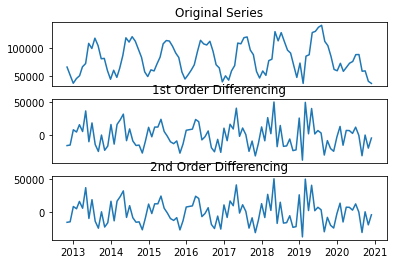

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(train['Fremont Bridge Total']);
ax1.set_title('Original Series'); 
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(train['Fremont Bridge Total'].diff()); 
ax2.set_title('1st Order Differencing'); 
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(train['Fremont Bridge Total'].diff());
ax3.set_title('2nd Order Differencing')
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
Ensure you are adjusting the code to select the correct column from train 
<br>
</div>

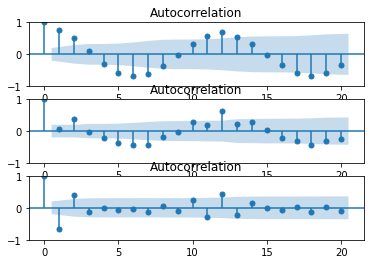

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(train['Fremont Bridge Total'], ax=ax1)
plot_acf(train['Fremont Bridge Total'].diff().dropna(), ax=ax2)
plot_acf(train['Fremont Bridge Total'].diff().diff().dropna(), ax=ax3)
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
From the graph above make sure you make a note of the best value for d
<br>
</div>

**Step 3: Finding the value of p , the autoregressive order**

We shall use the PACF function in order to get p. This represents the order of previous data points that we want in order to predict the next data point. Lets look at this for our data. Notice how we are applying the pcf to the detrended data.

<div class="alert alert-block alert-warning">
<b>Question </b>
Select the correct column
<br>
</div>

C:\Users\PeterBaksh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


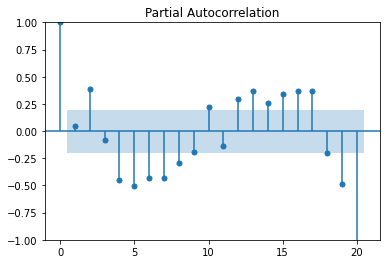

In [18]:
plot_pacf(train['Fremont Bridge Total'].diff().dropna())
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
From the graph above make a note for the best value of p
<br>
</div>

**Step 4 : calculating q**

The moving average part of the coefficents can be calculated from the ACF. Our value of q should be equl to the number of points that fall outside the zone of insignificance. However we should be looking at quite significant spikes and ignore the seaosonal spike. 

<div class="alert alert-block alert-warning">
<b>Question </b>
Select the correct column
<br>
</div>

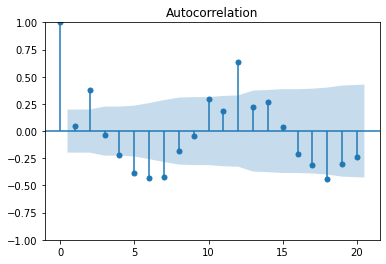

In [19]:
plot_acf(train['Fremont Bridge Total'].diff().dropna())
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
Make a note for an approriate value of q
<br>
</div>
**We now fit our ARIMA model to the data we have in train specifying the values for p q and d**

<div class="alert alert-block alert-warning">
<b>Question </b>
Fit the arima model with the correct column and the estimation for p d and q
<br>
</div>

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Fremont Bridge Total'], order = (0,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Fremont Bridge Total   No. Observations:                   99
Model:                   ARIMA(0, 1, 0)   Log Likelihood               -1100.107
Date:                  Tue, 04 Apr 2023   AIC                           2202.214
Time:                          09:08:02   BIC                           2204.799
Sample:                      10-01-2012   HQIC                          2203.260
                           - 12-01-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.262e+08   4.64e+07      7.037      0.000    2.35e+08    4.17e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.61   Prob(JB):                         0.15
Heteroskedasticity (H):               1.64   Skew:                             0.48
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**We shall not look to deeply into the summary apart from to note that the AIC can be used as a measure of how well the model fits the data and that the number of coefficients will depend on the settings for the number of moving average and autoregressive components that you included in the model.** 

<div class="alert alert-block alert-warning">
<b>Question </b>
Store the results in the dataframe. Update the description of the model and the data
<br>
</div>

In [21]:
train_fit_arima = model_fit.fittedvalues
test_forecast_arima = model_fit.forecast(steps = len(test))
results = update_results('ARIMA', 'bridge',results, train, train_fit_arima, test, test_forecast_arima)
results

model    data train_rmse train_mape train_r2 test_rmse test_mape test_r2
0    ets  bridge    37695.5        9.0     0.89  28320.61      12.0     0.9
0  ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   -1.15

<div class="alert alert-block alert-warning">
<b>Question </b>
Adjust the code below to ensure the columns have been updated
<br>
</div>

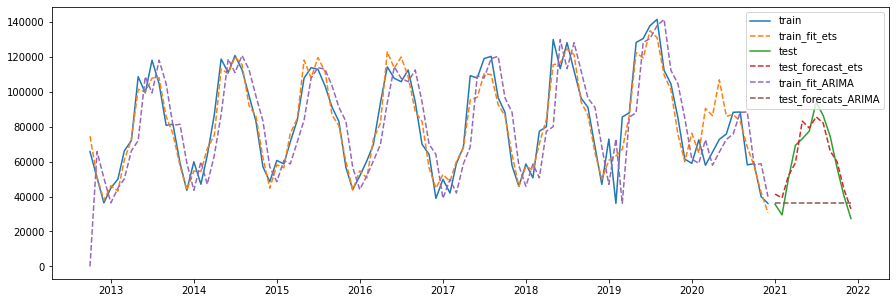

In [22]:
plt.plot(train.index, train['Fremont Bridge Total'])
plt.plot(train.index, train_fit_ets, '--')
plt.plot(test.index, test['Fremont Bridge Total'])
plt.plot(test.index, test_forecast_ets, '--')
plt.plot(train.index, train_fit_arima, '--')
plt.plot(test.index, test_forecast_arima, '--')
plt.legend(['train', 'train_fit_ets', 'test', 'test_forecast_ets', 'train_fit_ARIMA', 'test_forecats_ARIMA'])
# plt.xlim(['1958', '1961'])
# plt.ylim([200, 650])
fig = plt.gcf()
fig.set_size_inches(15 ,5)

**Clearly ARIMA is struggling to forecast well without the seasonality component.... This is where SARIMA comes in**

**SARIMA(p,d,q)(P,D,Q)m**

SARIMA is the seasonal version of ARIMA that has 3 more coefficients, P, Q, D , m these are the seasonal specific terms for the SARIMA algorithm.

- p: the order of the autoregressive (AR) term in an ARIMA model, which represents the dependence of the current value on its previous values.
- q: the order of the moving average (MA) term in an ARIMA model, which represents the dependence of the current value on past error terms.
- d: the degree of differencing in an ARIMA model, which transforms the non-stationary time series into a stationary one.
- P: the order of the seasonal AR term in a SARIMA model, which models the seasonal variation of the time series.
- Q: the order of the seasonal MA term in a SARIMA model, which models the seasonal variation of the time series.
- D: the degree of seasonal differencing in a SARIMA model, which transforms the seasonal time series into a stationary one.
- m: the number of time periods in a seasonal cycle, which is used to identify the period of the seasonal variation in the time series.

**To estimate P Q and D we need to repeat the ARIMA steps for only the seasonal component. Therefore we need to extract the seasonal component first. We can use the decompose function to do this which we saw before. lets see it again**

<div class="alert alert-block alert-warning">
<b>Question </b>
Adjust the code below for the correct column and choose either a mul or add model 
<br>
</div>

In [23]:
seasonal_decompose(train['Fremont Bridge Total'],model='multiplicative')

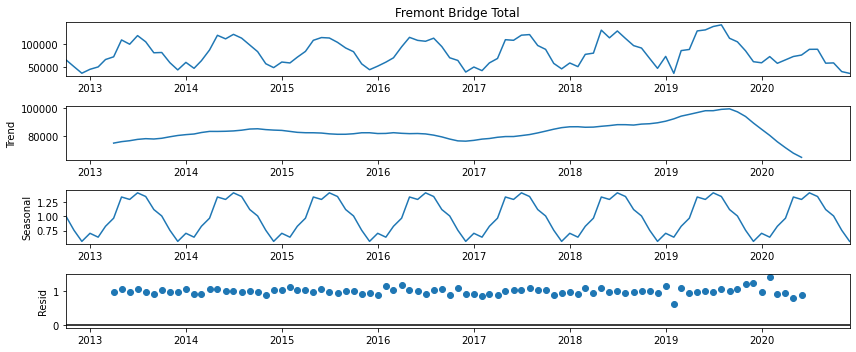

In [24]:
fig = decomp.plot()
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show();

<AxesSubplot:xlabel='Date'>

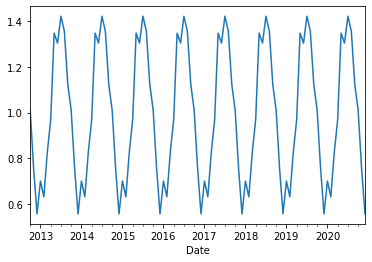

In [25]:
seasonal = decomp.seasonal
seasonal.plot()

Now we have the seasonal component we appy the same steps we did in arima to find p q and d

<div class="alert alert-block alert-warning">
<b>Question </b>
Can you confirm that D = 0
<br>
</div>


**Selecting Q**

Count the number of lags that are outside the zone of signficance (clearly) of the PCF and the number will be equal to the Q param


C:\Users\PeterBaksh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


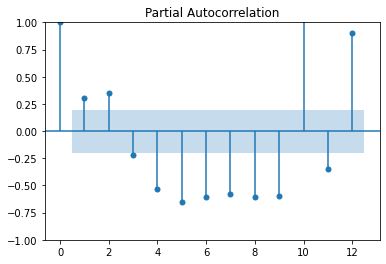

In [26]:
plot_pacf(seasonal.diff().dropna(), lags = 12)
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
Make a note on the number of signifcant spikes here for Q. This is always a rough estimate
<br>
</div>

**Selecting P**

Count the number of points that are outside of the zone of signifcance and this will equal the value of p

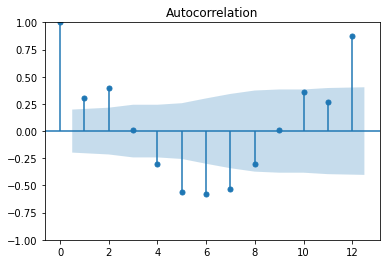

In [27]:
plot_acf(seasonal.diff().dropna(), lags = 12)
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
Make a note of a rough value for P
<br>
</div>



**We now fit our SARIMA model using the coefficients for the seasonality**

<div class="alert alert-block alert-warning">
<b>Question </b>
For the seasonal aarima with the parameters you have identified. 
<br>
</div>

In [28]:
d = 1; p = 1; q = 2; Q =10; P = 6; D = 0; m = 12
model = sm.tsa.statespace.SARIMAX(train['Fremont Bridge Total'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()
model_fit.summary()

C:\Users\PeterBaksh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                    SARIMAX Results                                                     
========================================================================================================================
Dep. Variable:                                             Fremont Bridge Total   No. Observations:                   99
Model:             SARIMAX(1, 1, 2)x(6, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 12)   Log Likelihood               -1071.448
Date:                                                          Tue, 04 Apr 2023   AIC                           2182.896
Time:                                                                  09:08:24   BIC                           2234.595
Sample:                                                              10-01-2012   HQIC                          2203.807
                                                                   - 12-01-2020                                         
Covariance Type:                                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1326      0.707      0.187      0.851      -1.254       1.519
ma.L1         -0.3609      0.709     -0.509      0.611      -1.751       1.029
ma.L2          0.3356      0.239      1.402      0.161      -0.134       0.805
ar.S.L12       0.1266   3.54e+04   3.58e-06      1.000   -6.94e+04    6.94e+04
ar.S.L24       0.0554    3.9e+04   1.42e-06      1.000   -7.64e+04    7.64e+04
ar.S.L36       0.1024   2.83e+04   3.62e-06      1.000   -5.54e+04    5.54e+04
ar.S.L48       0.0941   3.41e+04   2.75e-06      1.000   -6.69e+04    6.69e+04
ar.S.L60       0.1362   3.17e+04   4.29e-06      1.000   -6.22e+04    6.22e+04
ar.S.L72       0.1015   2.33e+04   4.35e-06      1.000   -4.57e+04    4.57e+04
ma.S.L12       0.2392   3.73e+04   6.42e-06      1.000    -7.3e+04     7.3e+04
ma.S.L24       0.1124    4.8e+04   2.34e-06      1.000   -9.41e+04    9.41e+04
ma.S.L36       0.0845   5.35e+04   1.58e-06      1.000   -1.05e+05    1.05e+05
ma.S.L48       0.0190   9.81e+04   1.94e-07      1.000   -1.92e+05    1.92e+05
ma.S.L60      -0.0019   6.86e+04  -2.73e-08      1.000   -1.35e+05    1.35e+05
ma.S.L72      -0.0986   1.04e+05  -9.47e-07      1.000   -2.04e+05    2.04e+05
ma.S.L84       0.0070   6.34e+04   1.11e-07      1.000   -1.24e+05    1.24e+05
ma.S.L96       0.0221   2.56e+05   8.61e-08      1.000   -5.02e+05    5.02e+05
ma.S.L108      0.0023    8.9e+05   2.54e-09      1.000   -1.74e+06    1.74e+06
ma.S.L120      0.0034   5.64e+05   6.08e-09      1.000    -1.1e+06     1.1e+06
sigma2      2.585e+08     60.928   4.24e+06      0.000    2.58e+08    2.58e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.63   Prob(JB):                         0.88
Heteroskedasticity (H):               0.92   Skew:                            -0.07
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.04e+25. Standard errors may be unstable.
"""

**Notice far more coefficients that are there to capture the infomation in the seasonality**

**Hopefully you get the idea of what is going on below now. We extract the fitted datapoints, the predictions, analyse them and store them. We then view the plots**

<div class="alert alert-block alert-warning">
<b>Question </b>
Update the results metric table below with an appropriate description for the model and data
<br>
</div>

In [29]:
train_fit_sarima = model_fit.fittedvalues
test_forecast_sarima = model_fit.forecast(steps = len(test))
results = update_results('SARIMA', 'bridge',results, train, train_fit_sarima, test, test_forecast_sarima)
results


model    data train_rmse train_mape train_r2 test_rmse test_mape test_r2
0     ets  bridge    37695.5        9.0     0.89  28320.61      12.0     0.9
0   ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   -1.15
0  SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0    0.77

**SARIMA looks like an improvement on the ETS algorithm**

<div class="alert alert-block alert-warning">
<b>Question </b>
Adjust the plot below so it fits for our new data 
<br>
</div>

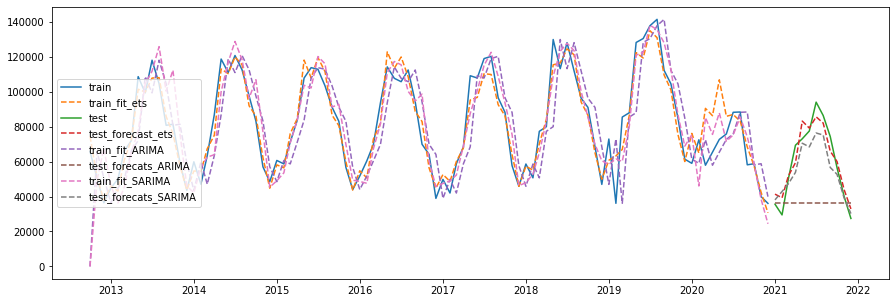

In [30]:
plt.plot(train.index, train['Fremont Bridge Total'])
plt.plot(train.index, train_fit_ets, '--')
plt.plot(test.index, test['Fremont Bridge Total'])
plt.plot(test.index, test_forecast_ets, '--')
plt.plot(train.index, train_fit_arima, '--')
plt.plot(test.index, test_forecast_arima, '--')
plt.plot(train.index, train_fit_sarima, '--')
plt.plot(test.index, test_forecast_sarima, '--')
plt.legend(['train', 'train_fit_ets', 'test', 'test_forecast_ets', 'train_fit_ARIMA', 'test_forecats_ARIMA',
            'train_fit_SARIMA', 'test_forecats_SARIMA'], loc = 'center left')
# plt.xlim([pd.to_datetime('1958-01-01'), pd.to_datetime('1961')])
# plt.ylim([200, 650])
fig = plt.gcf()
fig.set_size_inches(15 ,5)

**How important are setting the SARIMA Parameters?**

The parameters do effect how the model performs however we have only estimated them. For example lets see the effect when we use seasonal params as Q and P equal to 1 instead. 



<div class="alert alert-block alert-warning">
<b>Question </b>
Observe the effect of the parameters that you picked. Set P and Q to 1 
<br>
</div>

In [31]:
Q =1; P = 1; D = 0; m = 12
model = sm.tsa.statespace.SARIMAX(train['Fremont Bridge Total'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()
model_fit.summary()
train_fit_sarima = model_fit.fittedvalues
test_forecast_sarima = model_fit.forecast(steps = len(test))
results = update_results('SARIMA- PQ=1', 'bridge',results, train, train_fit_sarima, test, test_forecast_sarima)
results

model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84

**Notice we get a slight reduction in the test however the training and testing rmse were worse. In practise we would reccomend that you run a Grid search of a range of values for all your paramters especially p q an P Q. The easiest way to do this would be to run nested for loops cycling through the parameters that you want to try**

<div class="alert alert-block alert-warning">
<b>Extension </b>
ADVANCED : In the cell below set up mutliple nested for loops to run different Sarima Models with different values for p d and q as well as P D and Q. For each iteration store the results and append them to a dataframe. You can use the same update results function we are using here, just change the name
<br>
</div>

# Regression Forecasting for More Complicated Time Series

ETS and SARIMA model implimentations may struggle when dealing with multiple seasonality. ETS cannot accept multiple seasonal periods , whilst it can detect them it is then prone to overfitting too many seasonal periods. Feel free to try this setting the ETS Seasonal period parameter to None ( we shall use this as a baseline model briefly in our analysis later on).  Alterantively you could manually make many ETS models and combine them to prevent overfitting however this is hard work.  Whilst in theory SARIMA can deal with multiple seasonality in Python in stats models it can't be done with current packages (as far as I am aware). This poses a limitation for time series that have multiple seasonal periods occuring. Furthermore whilst SARIMAMAX can deal with **exogenous** variables (variables that may influence the time series) regression can also do this, and the regresison algorithm will also likely run far quicker. 

So lets look at the dataset and get into time series forecasting using Regression

<div class="alert alert-block alert-warning">
<b>Question </b>
Bring in some more complicated data for our rgression analysis.
'https://github.com/DrPBaksh/workshop-data/blob/main/bike_counts.csv?raw=true'

This data contains the counts of the number of rental bikes that were taking our each hour at a bike sharing compnay. We also have data on the weather and if it was a national holiday
<br>
</div>

In [33]:
X = pd.read_csv('https://github.com/DrPBaksh/workshop-data/blob/main/bike_counts.csv?raw=true', parse_dates = True).drop(columns = ['Unnamed: 0'])
X.head()

Date_Time  Count     weathersit  temp_degrees  windspeed_kph  \
0  2011-01-01 00:00:00     16  Partly cloudy           9.6            0.0   
1  2011-01-01 01:00:00     38  Partly cloudy           8.8            0.0   
2  2011-01-01 02:00:00     31  Partly cloudy           8.8            0.0   
3  2011-01-01 03:00:00     12  Partly cloudy           9.6            0.0   
4  2011-01-01 04:00:00      1  Partly cloudy           9.6            0.0   

   hummidity  holiday  
0       81.0      0.0  
1       80.0      0.0  
2       80.0      0.0  
3       75.0      0.0  
4       75.0      0.0

In [247]:
X.shape

(17379, 7)

In [248]:
X.dtypes

Date_Time         object
Count              int64
weathersit        object
temp_degrees     float64
windspeed_kph    float64
hummidity        float64
holiday          float64
dtype: object

<div class="alert alert-block alert-warning">
<b>Question </b>
Change the 'Date_Time' column to be a date time datatype
<br>
</div>

In [34]:
X['Date_Time'] = pd.to_datetime(X['Date_Time'])

In [35]:

X.head()

Date_Time  Count     weathersit  temp_degrees  windspeed_kph  \
0 2011-01-01 00:00:00     16  Partly cloudy           9.6            0.0   
1 2011-01-01 01:00:00     38  Partly cloudy           8.8            0.0   
2 2011-01-01 02:00:00     31  Partly cloudy           8.8            0.0   
3 2011-01-01 03:00:00     12  Partly cloudy           9.6            0.0   
4 2011-01-01 04:00:00      1  Partly cloudy           9.6            0.0   

   hummidity  holiday  
0       81.0      0.0  
1       80.0      0.0  
2       80.0      0.0  
3       75.0      0.0  
4       75.0      0.0

**View the data**

<div class="alert alert-block alert-warning">
<b>Question </b>
View the data. Ensure you change the columns
<br>
</div>

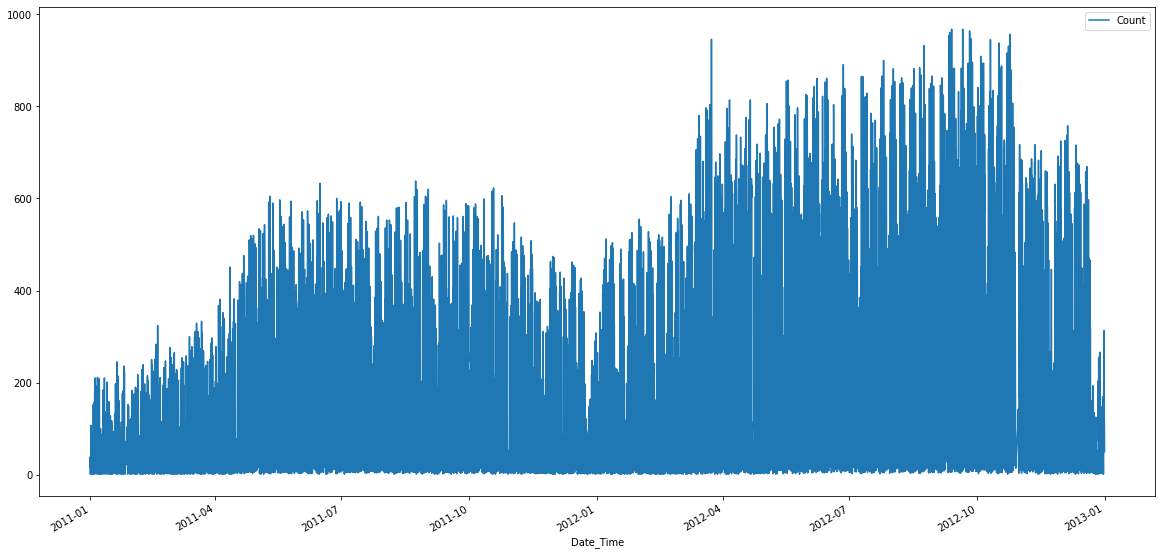

In [36]:
X.set_index('Date_Time').plot(y = 'Count')
fig = plt.gcf()
fig.set_size_inches(20, 10)

**The above data was over a long period we could not see what was going on at the day / hour level. We zoom in below**

<div class="alert alert-block alert-warning">
<b>Question </b>
Zoom in on an appropriate time window for the data 
<br>
</div>

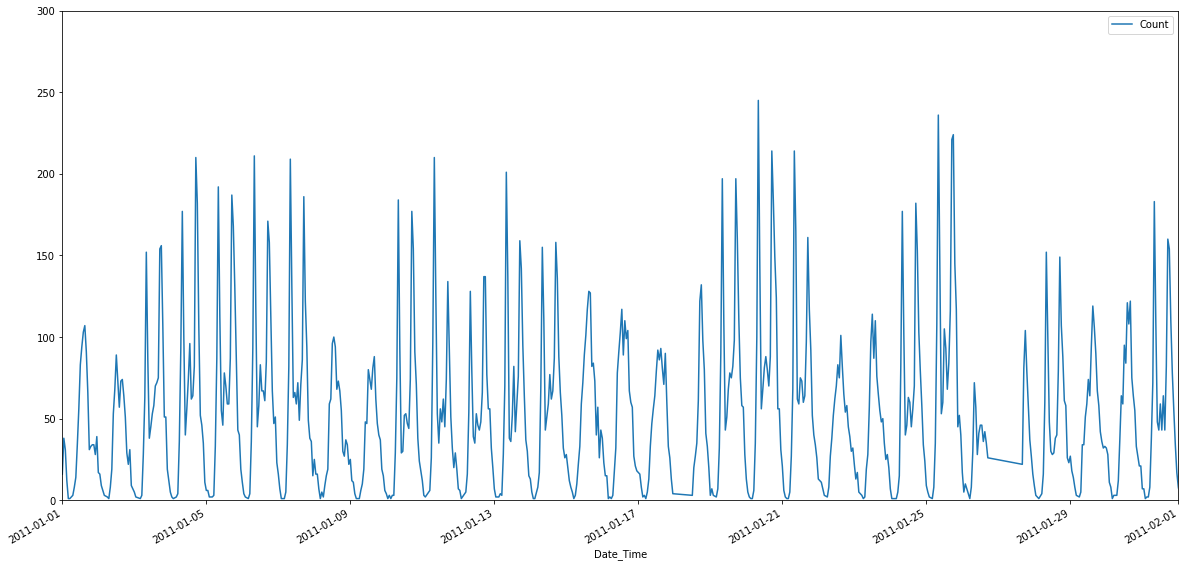

In [37]:
X.set_index('Date_Time').plot(y = 'Count')
plt.xlim(['2011-01-01', '2011-02-01'])
plt.ylim([0, 300])
fig = plt.gcf()
fig.set_size_inches(20, 10)

**Regression and FB Prophet deal with missing values fine. However ETS and ARIMA do not. It is worth checking and dealing with these missing values if we want to compare models**

<div class="alert alert-block alert-warning">
<b>Question </b>
Make the date time column the index
<br>
</div>

In [39]:
X = X.set_index('Date_Time')

**Running the cell below should give an error**

In [40]:
X.index.freq = 'H'

ValueError: Inferred frequency None from passed values does not conform to passed frequency H

**We can get a better ideas as to what dates are missing by comparing hourly data between two dates with the dates that are in our dataset**

In [48]:
gaps = pd.date_range(start=min(X.index), 
                     end=max(X.index),
                     freq='H').difference(X.index)
gaps

DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-10-30 07:00:00', '2012-10-30 08:00:00',
               '2012-10-30 09:00:00', '2012-10-30 10:00:00',
               '2012-10-30 11:00:00', '2012-10-30 12:00:00',
               '2012-11-08 03:00:00', '2012-11-29 03:00:00',
               '2012-12-24 04:00:00', '2012-12-25 03:00:00'],
              dtype='datetime64[ns]', length=166, freq=None)

In [49]:
X.index.to_frame().duplicated().sum()

0

**Now lets deal with the missing data**

We should impute these missing values. We are first going to create a complete set of dates. We will then merge these clean dates with the exisiting table using a left join. This will leave missing values in this dataframe. We shall then fill these missing values using backfill

<div class="alert alert-block alert-warning">
<b>Question </b>
We are creating a new dataframe called cleaned _date. Make sure the column name is called "Date_Time"
<br>
</div>

In [50]:
cleaned_date = pd.date_range(start=min(X.index), 
                     end=max(X.index),
                     freq='H')
X_cleaned = pd.DataFrame(cleaned_date, columns = ['Date_Time'])
cleaned_date.shape, X.shape

((17544,), (17379, 6))

<div class="alert alert-block alert-warning">
<b>Question </b>
Merge the old data with the new cleaned dates dataframe. This will give null values for missing dates. Use the bfill method to impute them 
<br>
</div>

In [51]:
X_cleaned = X_cleaned.merge(X, how = 'left', on= 'Date_Time')
X_cleaned.set_index('Date_Time', inplace = True)
X_cleaned = X_cleaned.fillna(method='bfill')
X_cleaned.index.freq = 'H'

In [ ]:
X_cleaned.isna().sum()

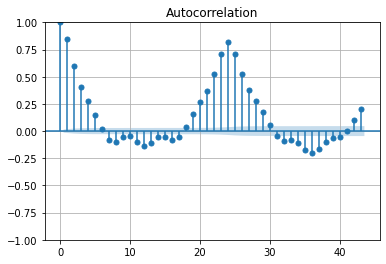

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(X_cleaned['Count'])
plt.grid('minor')
plt.show()


**We observe that there is a strong spike at 24 hours which indicates 24 hour seasonality**

We can pull out this 24 hour seasonality from the time series using the decomposition function as shown below. Notice when we plot the trend there is still lots of structure in there. This likely represents the other seasonalities in the time series

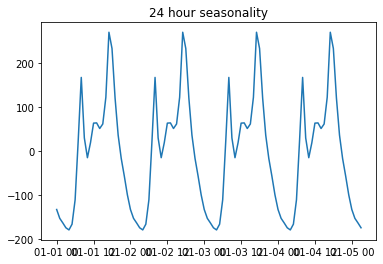

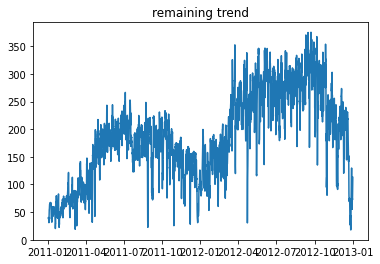

In [110]:
decomp= sm.tsa.seasonal_decompose(X_cleaned['Count'], period=24, model='add')
plt.plot(decomp.seasonal[0:100])
plt.title('24 hour seasonality')
plt.show()
plt.plot(decomp.trend)
plt.title('remaining trend')
plt.show()



We now want to uncover if there is seasonality at the next level up in time, so we subtract the 24 hour seasonality from the original time series as shown below. We shall also re sample the data to the day level at this point




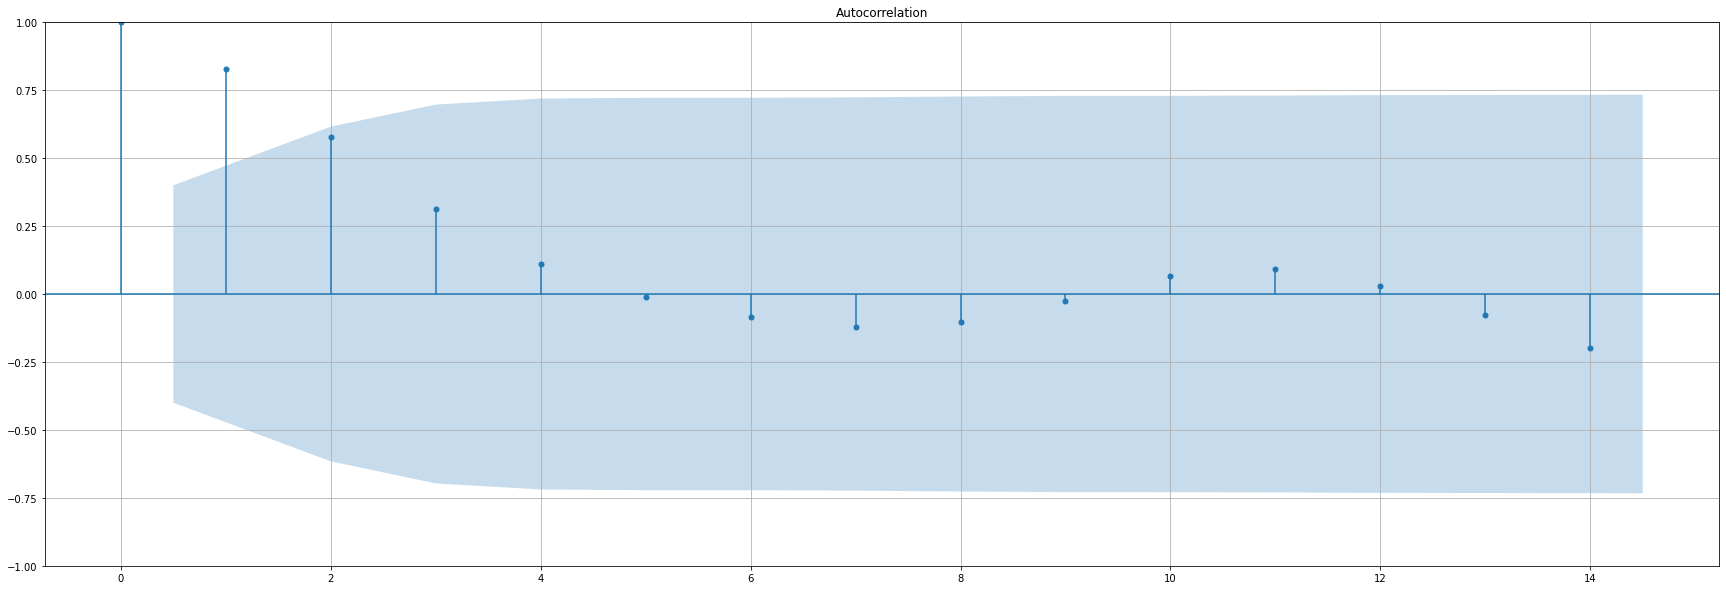

In [112]:
deseasoned_1 = X_cleaned['Count'] - decomp.seasonal



acf = plot_acf(deseasoned_1.resample('M').mean())
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(30, 10)
plt.show()

**We observe that the autocorrelation seems to peak at between 6 and 7 days which indicates a repeating pattern every week **. Now we can decompose the time series by the week and investigate that for patterns

So finally lets pull out this monthly seasonality based on 365*24 periods 


## <a id='6'> **Building Regression Model** </a>

**Just before we do our regresison model lets extract a baseline model using ETS*
- The code below first splits our data into training and testing data and then we fit an ets model
- ETS does not allow us to set seasonal periods manually. If we set the seasonal periods to None then ETS tries to fit the best periods for us 

**First lets create a train test split for our new data suitable for ets**

In [52]:
thresh = 0.95 #  95 % of the data used for training

train= X_cleaned.iloc[:int(len(X) * thresh), :]
test= X_cleaned.iloc[int(len(X) * thresh):, :]

<div class="alert alert-block alert-warning">
<b>Question </b>
Create a baseline ETS model. Ensure you update the results with the correct names. Put the most dominate seasonal periods in. Check you are putting in the correct column name for the column you are trying to predict
<br>
</div>

In [54]:
model = sm.tsa.ETSModel(train['Count'] ,error='mul', trend= None, seasonal='mul', seasonal_periods=24).fit()

train_fit_ets_2 = model.fittedvalues
test_forecast_ets_2 = model.forecast(steps = len(test))
results = update_results('ETS', 'bikes',results, train.iloc[:, 0], train_fit_ets_2, test.iloc[:,0], test_forecast_ets_2)
# results.head()


C:\Users\PeterBaksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
results

model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   
0           ETS   bikes      87.66       83.0     0.76    118.71     134.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84  
0    0.48

<div class="alert alert-block alert-warning">
<b>Question </b>
Update column names 
<br>
</div>

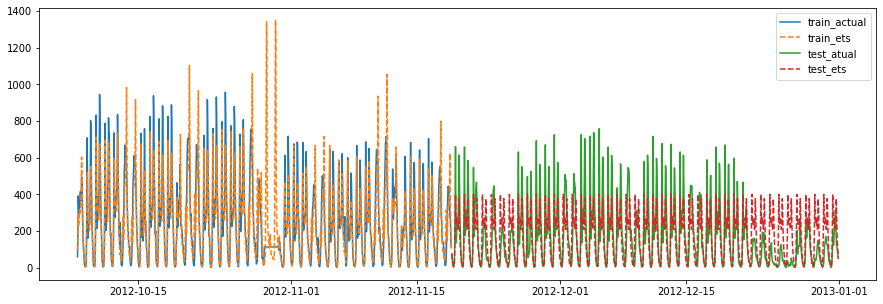

In [56]:
plt.plot(train.index[-1000:], train['Count'][-1000:])
plt.plot(train.index[-1000:], train_fit_ets_2[-1000:], '--')
plt.plot(test.index, test['Count'])
plt.plot(test.index, test_forecast_ets_2, '--')
plt.legend(['train_actual', 'train_ets', 'test_atual', 'test_ets'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)



In [193]:
# model.param_names

### Regression Recap

In regression we are trying to find a model to predict a dependent variable (in our case total actual load) from one or more independant variables. 

### What could be influencing our actual load

- In our dataset we have the **temperature**. This could be. When considering your problem features external to the time series could definitly be used as a factor to help predict your time series
- Time of day : We are seeing fluctuations within a **24 hour period**. This is telling us we need to include time of day in a regression forecast
- Day of the week: There looks to be fluctuations in demand depending on the **day of the week**. If this is the case we need to include this as a feature in our predictin
- Month of the year : Does the data look to be changing depending on Month? It looks like it is. If we are unsure we can group the data by month and have a look at this?
- Year : Is the data changing year by year. If it is this needs to be a feature that we can include in our regression analysis. 

##### Other variables to consider
- lag variables : These are variables that we can create based on, in this case, averages of the load over a period prior to the forecast. These can sometimes be influencial in forecasting
- Holiday specific dates : National holidays  are good candidates for these. Depending on the problem there could be other dates around the year that could be included in a regression analysis. For example prediciting holiday bookings will not just be dependant on the seasonal date however there will be a large influence on the school holidays. Having a column that lets the algorithm know if this date is a school holiday or not is likely to improve your forecast signficantly. 

## Prepare the data for regression

- We must prepare the data in the same way we prepared data for regression earlier on in the course. So lets immediately split our data, **not randomly but by time again.**
- We can seel below total load actual will become our target and temp_mean will become an exogenous variable


In [194]:
X_cleaned.head(2)

Count     weathersit  temp_degrees  windspeed_kph  \
Date_Time                                                                
2011-01-01 00:00:00   16.0  Partly cloudy           9.6            0.0   
2011-01-01 01:00:00   38.0  Partly cloudy           8.8            0.0   

                     hummidity  
Date_Time                       
2011-01-01 00:00:00       81.0  
2011-01-01 01:00:00       80.0

<div class="alert alert-block alert-warning">
<b>Question </b>
y will equal the column you are trying to predict. Update with the correct columns
<br>
</div>

In [59]:
y = X_cleaned['Count']
X_train = X_cleaned.iloc[:int(len(X) * thresh), :]
X_test = X_cleaned.iloc[int(len(X) * thresh):, :]
X_train.drop(columns = ['Count'], inplace = True)
X_test.drop(columns = ['Count'], inplace = True)
y_train = y[:int(len(X) * thresh)]
y_test = y[int(len(X) * thresh):]

C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\1531545257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Count'], inplace = True)
C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\1531545257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Count'], inplace = True)


**Lets visualise what section of our data will be used for both training and for testing**

<div class="alert alert-block alert-warning">
<b>Question </b>
Update column names 
<br>
</div>

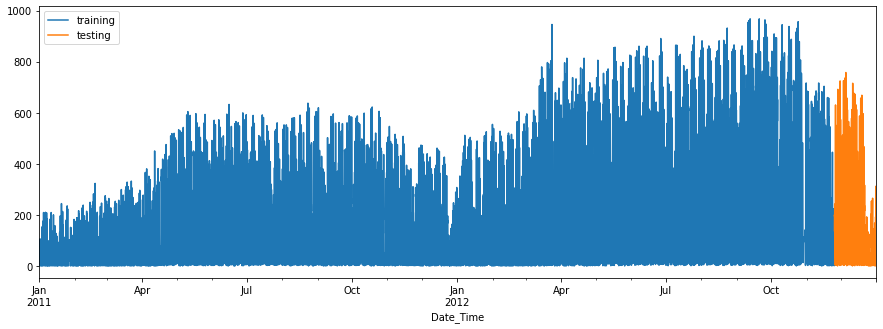

In [58]:
fig = plt.figure(figsize=(15, 5))
y_train.plot(y = 'Count')
y_test.plot(y = 'Count')
plt.legend(['training', 'testing'])

**Lets explore whats currently in X_train**

In [197]:
X_train.head()

weathersit  temp_degrees  windspeed_kph  hummidity
Date_Time                                                                 
2011-01-01 00:00:00  Partly cloudy           9.6            0.0       81.0
2011-01-01 01:00:00  Partly cloudy           8.8            0.0       80.0
2011-01-01 02:00:00  Partly cloudy           8.8            0.0       80.0
2011-01-01 03:00:00  Partly cloudy           9.6            0.0       75.0
2011-01-01 04:00:00  Partly cloudy           9.6            0.0       75.0

## Generating our time features
- At the moment regression algorithms cannot work with a timestamp, they require an integer or a float. Therefore we need to break down datetime into its components. Note here you could also be introducing lag variables

In [61]:
X_train['year'] = [X_train.index[i].year for i in range(len(X_train))]
X_train['month'] = [X_train.index[i].month for i in range(len(X_train))]
X_train['time'] = [int(str(X_train.index[i].time())[0:2]) for i in range(len(X_train))]
X_train['dayofweek'] = [X_train.index[i].weekday() for i in range(len(X_train))]
X_train['weekend'] = np.where(X_train['dayofweek'].isin([5, 6]), 1, 0)
X_train.head()

C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\343510581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['year'] = [X_train.index[i].year for i in range(len(X_train))]
C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\343510581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month'] = [X_train.index[i].month for i in range(len(X_train))]
C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\343510581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

weathersit  temp_degrees  windspeed_kph  hummidity  \
Date_Time                                                                    
2011-01-01 00:00:00  Partly cloudy           9.6            0.0       81.0   
2011-01-01 01:00:00  Partly cloudy           8.8            0.0       80.0   
2011-01-01 02:00:00  Partly cloudy           8.8            0.0       80.0   
2011-01-01 03:00:00  Partly cloudy           9.6            0.0       75.0   
2011-01-01 04:00:00  Partly cloudy           9.6            0.0       75.0   

                     holiday  year  month  time  dayofweek  weekend  
Date_Time                                                            
2011-01-01 00:00:00      0.0  2011      1     0          5        1  
2011-01-01 01:00:00      0.0  2011      1     1          5        1  
2011-01-01 02:00:00      0.0  2011      1     2          5        1  
2011-01-01 03:00:00      0.0  2011      1     3          5        1  
2011-01-01 04:00:00      0.0  2011      1     4          5        1

**Repeat for the testing data so we have the same features**

In [62]:
X_test['year'] = [X_test.index[i].year for i in range(len(X_test))]
X_test['month'] = [X_test.index[i].month for i in range(len(X_test))]
X_test['time'] = [int(str(X_test.index[i].time())[0:2]) for i in range(len(X_test))]
X_test['dayofweek'] = [X_test.index[i].weekday() for i in range(len(X_test))]
X_test['weekend'] = np.where(X_test['dayofweek'].isin([5, 6]), 1, 0)
X_test.head()

C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\2307637814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['year'] = [X_test.index[i].year for i in range(len(X_test))]
C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\2307637814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['month'] = [X_test.index[i].month for i in range(len(X_test))]
C:\Users\PeterBaksh\AppData\Local\Temp\ipykernel_19096\2307637814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

weathersit  temp_degrees  windspeed_kph  \
Date_Time                                                                
2012-11-25 10:00:00         Partly cloudy           9.6           17.0   
2012-11-25 11:00:00  Mist + Broken clouds          10.4           15.0   
2012-11-25 12:00:00  Mist + Broken clouds          10.4           15.0   
2012-11-25 13:00:00  Mist + Broken clouds          10.4           11.0   
2012-11-25 14:00:00  Mist + Broken clouds          12.0           17.0   

                     hummidity  holiday  year  month  time  dayofweek  weekend  
Date_Time                                                                       
2012-11-25 10:00:00       48.0      0.0  2012     11    10          6        1  
2012-11-25 11:00:00       41.0      0.0  2012     11    11          6        1  
2012-11-25 12:00:00       41.0      0.0  2012     11    12          6        1  
2012-11-25 13:00:00       41.0      0.0  2012     11    13          6        1  
2012-11-25 14:00:00       42.0      0.0  2012     11    14          6        1

## EDA from our regression variables 

Lets quickly graph some of variables to get a better picture of what is going on in this case.


<div class="alert alert-block alert-warning">
<b>Question </b>
Plot the hummidity values against the y train values
<br>
</div>

C:\Users\PeterBaksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


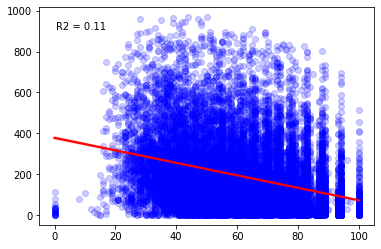

In [64]:
sns.regplot(X_train.hummidity.values, y_train.values, color='red', scatter_kws={'color': 'blue', 'alpha': 0.2})
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train.hummidity.values, y_train.values)
r_squared = r_value ** 2
plt.annotate(f'R2 = {r_squared:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

<div class="alert alert-block alert-warning">
<b>Question </b>
Update column names 
<br>
</div>

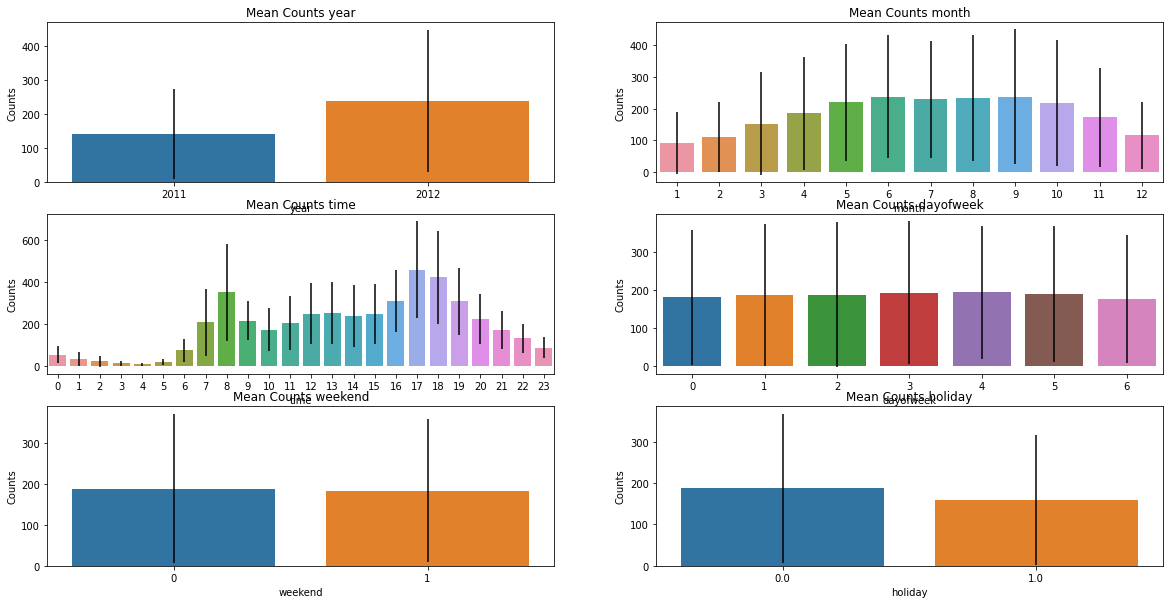

In [68]:
import copy
columns = ['year', 'month', 'time', 'dayofweek', 'weekend', 'holiday']
train_dataset = copy.deepcopy(X_train)
train_dataset['target'] = y_train

# Iterate over columns and create bar plot with error bars for each
for plot_count, col in enumerate(columns):
    # Calculate mean and std for unique values in column
    col_mean = train_dataset.groupby(col)['target'].mean()
    col_std = train_dataset.groupby(col)['target'].std()
    plt.subplot(3,2,plot_count + 1)
    # Create bar plot with error bars
    sns.barplot(x=col_mean.index, y=col_mean.values, yerr=col_std.values)

    # Add title and axis labels
    plt.title(f'Mean Counts {col}')
    plt.xlabel(col)
    plt.ylabel('Counts')

    # Show plot
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

## Regression Model 1: Linear regression

## Training with Date Time Components Only - to compare with ETS

In [202]:
X_train.head()

weathersit  temp_degrees  windspeed_kph  hummidity  \
Date_Time                                                                    
2011-01-01 00:00:00  Partly cloudy           9.6            0.0       81.0   
2011-01-01 01:00:00  Partly cloudy           8.8            0.0       80.0   
2011-01-01 02:00:00  Partly cloudy           8.8            0.0       80.0   
2011-01-01 03:00:00  Partly cloudy           9.6            0.0       75.0   
2011-01-01 04:00:00  Partly cloudy           9.6            0.0       75.0   

                     year  month  time  dayofweek  weekend  
Date_Time                                                   
2011-01-01 00:00:00  2011      1     0          5        1  
2011-01-01 01:00:00  2011      1     1          5        1  
2011-01-01 02:00:00  2011      1     2          5        1  
2011-01-01 03:00:00  2011      1     3          5        1  
2011-01-01 04:00:00  2011      1     4          5        1

<div class="alert alert-block alert-warning">
<b>Question </b>
train_temp will store our exogenous variables. We will then drop the same variables which we shall use later 
<br>
</div>

In [71]:
train_temp = X_train[['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity']]
X_train = X_train.drop(columns = ['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity'])
test_temp = X_test[['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity']] # we shall add it on later
X_test = X_test.drop(columns = ['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity'])
X_train.head(2)

holiday  year  month  time  dayofweek  weekend
Date_Time                                                          
2011-01-01 00:00:00      0.0  2011      1     0          5        1
2011-01-01 01:00:00      0.0  2011      1     1          5        1

<div class="alert alert-block alert-warning">
<b>Question </b>
Run the LR model
<br>
</div>

In [72]:
model = sm.OLS(y_train, sm.add_constant(X_train.values),missing='raise').fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     997.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:48:32   Log-Likelihood:            -1.0765e+05
No. Observations:               16666   AIC:                         2.153e+05
Df Residuals:                   16659   BIC:                         2.154e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.091e+05   4842.719    -43.175      0.000   -2.19e+05      -2e+05
x1           -34.8139      7.309     -4.763      0.000     -49.141     -20.487
x2           103.9497      2.407     43.178      0.000      99.231     108.669
x3             9.4052      0.363     25.876      0.000       8.693      10.118
x4            10.3958      0.173     60.119      0.000      10.057      10.735
x5             1.4138      0.993      1.424      0.154      -0.532       3.360
x6           -11.2291      4.336     -2.590      0.010     -19.728      -2.730
==============================================================================
Omnibus:                     2668.340   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4488.076
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       4.386   Cond. No.                     8.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-warning">
<b>Question </b>
Update the results and names and date range 
<br>
</div>

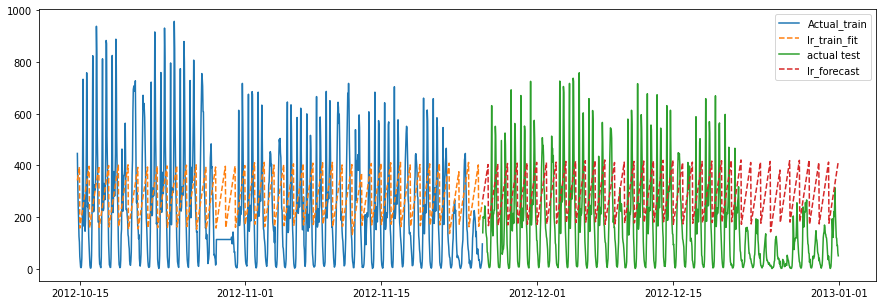

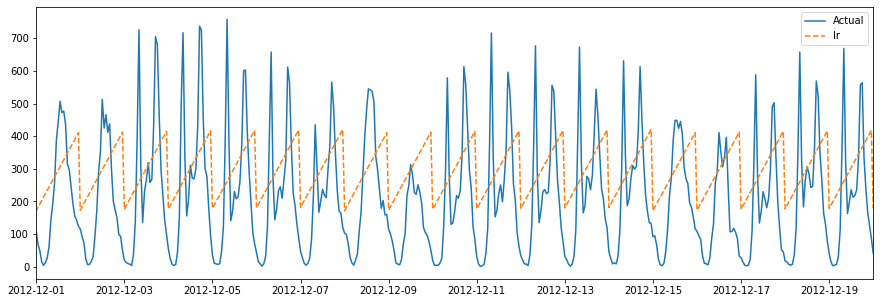

model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   
0           ETS   bikes      87.66       83.0     0.76    118.71     134.0   
0            LR   bikes      154.5      396.0     0.26    199.34     952.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84  
0    0.48  
0   -0.46

In [73]:
train_fit_lr = model.predict(sm.add_constant(X_train))
test_forecast_lr =  model.predict(sm.add_constant(X_test, has_constant = 'add'))
results = update_results('LR', 'bikes',results, y_train, train_fit_lr, y_test, test_forecast_lr)
results

plt.plot(y_train.index[-1000:], y_train[-1000:])
plt.plot(y_train.index[-1000:], train_fit_lr[-1000:], '--')
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.legend(['Actual_train', 'lr_train_fit', 'actual test', 'lr_forecast'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.xlim([pd.to_datetime('2012-12-01'), pd.to_datetime('2012-12-20')])
plt.legend(['Actual', 'lr'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

results.head(10)


In [ ]:
[100*metrics.mean_absolute_percentage_error(y_train, train_fit_ets_2).round(2)]

**Notice the linear behaviour in hour. The linear model cant fit to the data the way we have presented the data to it. The linear model can only fit linear trends, unless we one hot encode these columns. Lets see the effect of this now**

In [74]:

from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['month', 'time', 'dayofweek']

encoder = OneHotEncoder(categories='auto', sparse=False, drop='first').fit(X_train[columns_to_encode])

# Transform the training and test data
X_train_encoded = pd.DataFrame(encoder.transform(X_train[columns_to_encode]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[columns_to_encode]))

# Rename the columns in the encoded DataFrames
X_train_encoded.columns = encoder.get_feature_names(columns_to_encode)
X_test_encoded.columns = encoder.get_feature_names(columns_to_encode)

# Print the first few rows of the encoded DataFrames
X_train_encoded = pd.concat([X_train.loc[:, ['year', 'weekend']].reset_index(drop = True), X_train_encoded.reset_index(drop = True)],axis = 1)
X_test_encoded = pd.concat([X_test.loc[:, ['year', 'weekend']].reset_index(drop = True), X_test_encoded.reset_index(drop = True)], axis = 1)

C:\Users\PeterBaksh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PeterBaksh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
X_train_encoded.head()

year  weekend  month_2  month_3  month_4  month_5  month_6  month_7  \
0  2011        1      0.0      0.0      0.0      0.0      0.0      0.0   
1  2011        1      0.0      0.0      0.0      0.0      0.0      0.0   
2  2011        1      0.0      0.0      0.0      0.0      0.0      0.0   
3  2011        1      0.0      0.0      0.0      0.0      0.0      0.0   
4  2011        1      0.0      0.0      0.0      0.0      0.0      0.0   

   month_8  month_9  ...  time_20  time_21  time_22  time_23  dayofweek_1  \
0      0.0      0.0  ...      0.0      0.0      0.0      0.0          0.0   
1      0.0      0.0  ...      0.0      0.0      0.0      0.0          0.0   
2      0.0      0.0  ...      0.0      0.0      0.0      0.0          0.0   
3      0.0      0.0  ...      0.0      0.0      0.0      0.0          0.0   
4      0.0      0.0  ...      0.0      0.0      0.0      0.0          0.0   

   dayofweek_2  dayofweek_3  dayofweek_4  dayofweek_5  dayofweek_6  
0          0.0          0.0          0.0          1.0          0.0  
1          0.0          0.0          0.0          1.0          0.0  
2          0.0          0.0          0.0          1.0          0.0  
3          0.0          0.0          0.0          1.0          0.0  
4          0.0          0.0          0.0          1.0          0.0  

[5 rows x 42 columns]

**Notice the shape difference between encoded dataframe and our original dataframe**

In [76]:
X_train.shape, X_train.shape

((16666, 6), (16666, 6))

<div class="alert alert-block alert-warning">
<b>Question </b>
Train the new LR model
<br>
</div>

In [79]:
model = sm.OLS(y_train, sm.add_constant(X_train_encoded.values),missing='raise').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     761.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:50:39   Log-Likelihood:            -1.0140e+05
No. Observations:               16666   AIC:                         2.029e+05
Df Residuals:                   16624   BIC:                         2.032e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.931e+05   3391.295    -56.932      0.000      -2e+05   -1.86e+05
x1            95.9600      1.686     56.917      0.000      92.655      99.265
x2             1.7798      1.779      1.000      0.317      -1.708       5.267
x3            18.2744      3.984      4.587      0.000      10.466      26.083
x4            61.4594      3.900     15.758      0.000      53.815      69.104
x5            94.0826      3.931     23.935      0.000      86.378     101.787
x6           129.7712      3.899     33.285      0.000     122.129     137.413
x7           147.0329      3.932     37.393      0.000     139.326     154.740
x8           139.0420      3.898     35.668      0.000     131.401     146.683
x9           142.6962      3.900     36.591      0.000     135.052     150.340
x10          147.0581      3.931     37.406      0.000     139.352     154.764
x11          126.8922      3.898     32.551      0.000     119.251     134.533
x12           87.2848      4.034     21.638      0.000      79.378      95.192
x13           73.0600      4.850     15.063      0.000      63.553      82.567
x14          -20.3942      5.703     -3.576      0.000     -31.574      -9.215
x15          -30.8302      5.703     -5.406      0.000     -42.010     -19.651
x16          -41.9770      5.703     -7.360      0.000     -53.156     -30.798
x17          -46.9885      5.703     -8.239      0.000     -58.168     -35.809
x18          -34.0748      5.703     -5.974      0.000     -45.254     -22.895
x19           21.5597      5.703      3.780      0.000      10.380      32.739
x20          155.3583      5.703     27.239      0.000     144.179     166.538
x21          297.8374      5.703     52.220      0.000     286.658     309.017
x22          162.0849      5.703     28.419      0.000     150.905     173.264
x23          118.5276      5.706     20.774      0.000     107.344     129.711
x24          152.4542      5.706     26.720      0.000     141.271     163.638
x25          196.9325      5.706     34.516      0.000     185.749     208.116
x26          197.4441      5.706     34.606      0.000     186.261     208.627
x27          184.7078      5.706     32.374      0.000     173.524     195.891
x28          194.7308      5.706     34.130      0.000     183.547     205.914
x29          255.6300      5.706     44.804      0.000     244.447     266.813
x30          406.4916      5.706     71.245      0.000     395.308     417.675
x31          369.6761      5.706     64.793      0.000     358.493     380.859
x32          256.3663      5.706     44.933      0.000     245.183     267.550
x33          171.3173      5.706     30.027      0.000     160.134     182.501
x34          117.6761      5.706     20.625      0.000     106.493     128.859
x35           77.4196      5.706     13.569      0.000      66.236      88.603
x3

<div class="alert alert-block alert-warning">
<b>Question </b>
Update the results and names and date range 
<br>
</div>

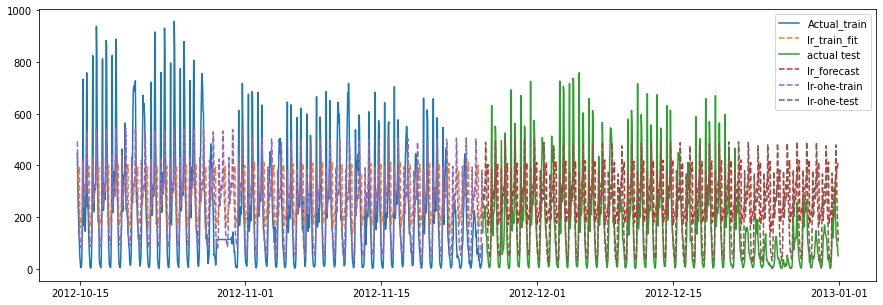

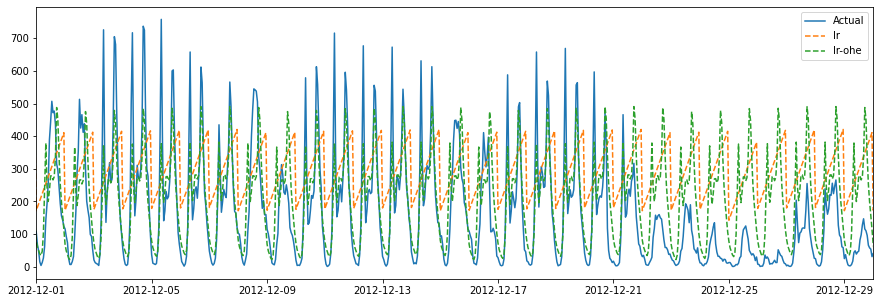

model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   
0           ETS   bikes      87.66       83.0     0.76    118.71     134.0   
0            LR   bikes      154.5      396.0     0.26    199.34     952.0   
0        LR-OHE   bikes     106.19      305.0     0.65    125.05     273.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84  
0    0.48  
0   -0.46  
0    0.43

In [80]:
train_fit_lr_2 = model.predict(sm.add_constant(X_train_encoded))
test_forecast_lr_2 =  model.predict(sm.add_constant(X_test_encoded, has_constant = 'add'))
results = update_results('LR-OHE', 'bikes',results, y_train, train_fit_lr_2, y_test, test_forecast_lr_2)
results

plt.plot(y_train.index[-1000:], y_train[-1000:])
plt.plot(y_train.index[-1000:], train_fit_lr[-1000:], '--')
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.plot(y_train.index[-1000:], train_fit_lr_2[-1000:], '--')
plt.plot(y_test.index, test_forecast_lr_2, '--')
plt.legend(['Actual_train', 'lr_train_fit', 'actual test', 'lr_forecast', 'lr-ohe-train', 'lr-ohe-test'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.plot(y_test.index, test_forecast_lr_2, '--')
plt.xlim([pd.to_datetime('2012-12-01'), pd.to_datetime('2012-12-30')])
plt.legend(['Actual', 'lr', 'lr-ohe'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

results


<div class="alert alert-block alert-warning">
<b>Question </b>
Make a comment about where the forecast is not doing well and why. Also thing why the MAPE could be so high.
<br>
</div>

##  <a id='1'> **Improvement using XGBoost** </a>

*XGBoost (eXtreme Gradient Boosting) is a powerful and popular machine learning algorithm used for regression and classification problems. It is an implementation of gradient boosting framework. Gradient boosting is an ensemble method that combines multiple weak models, typically decision trees, to create a stronger model. XGBoost improves upon the traditional gradient boosting algorithm by using a more regularized model formalization to control over-fitting, which gives it better performance.The algorithm works by iteratively training decision tree models on the negative gradient of the loss function of the previous iteration. The decision tree models are trained using the gradient descent algorithm. The final model is a weighted sum of all the decision tree models.The algorithm also includes a built-in regularization term, which helps to reduce overfitting and improve generalization. This is done by introducing a penalty term for the number of terminal nodes in the trees, which is controlled by a parameter called "gamma".Additionally, XGBoost includes several other features such as parallel processing, handling missing values, built-in cross-validation, and handling categorical variables. It is widely used in many Kaggle competitions and industry applications because of its high performance, speed and scalability.*

Resources about XGBoost regressor
- https://xgboost.readthedocs.io/en/stable/python/python_intro.html
- https://www.youtube.com/watch?v=OtD8wVaFm6E

<div class="alert alert-block alert-warning">
<b>Question </b>
Fit XGBoost
<br>
</div>

In [81]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<div class="alert alert-block alert-warning">
<b>Question </b>
Update the results and predictions
<br>
</div>

In [83]:
train_fit_xgb = model.predict(X_train_encoded)
test_forecast_xgb =  model.predict(X_test_encoded)
results = update_results('xgb-OHE', 'energy',results, y_train, train_fit_xgb, y_test, test_forecast_xgb)
results

model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   
0           ETS   bikes      87.66       83.0     0.76    118.71     134.0   
0            LR   bikes      154.5      396.0     0.26    199.34     952.0   
0        LR-OHE   bikes     106.19      305.0     0.65    125.05     273.0   
0       xgb-OHE  energy      64.62       98.0     0.87    109.68     160.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84  
0    0.48  
0   -0.46  
0    0.43  
0    0.56

<div class="alert alert-block alert-warning">
<b>Question </b>
Update the plots
<br>
</div>

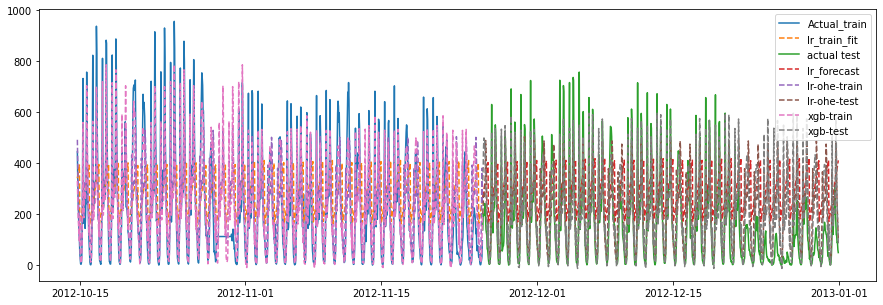

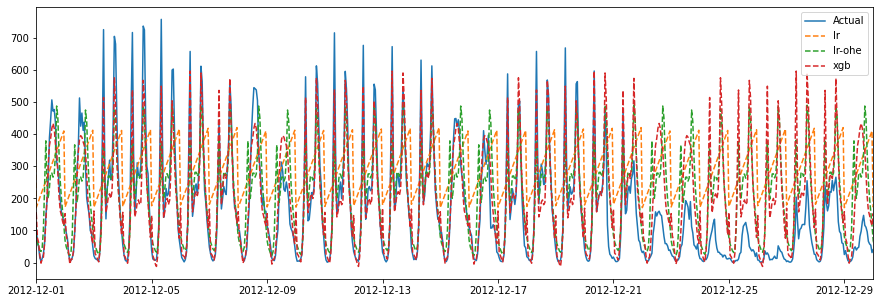

model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   
0           ETS   bikes      87.66       83.0     0.76    118.71     134.0   
0            LR  energy     154.61      395.0     0.26    199.69     959.0   
0        LR-OHE  energy     106.19      305.0     0.65    125.05     273.0   
0        LR-OHE  energy     106.19      305.0     0.65    125.05     273.0   
0       xgb-OHE  energy      64.62       98.0     0.87    109.68     160.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84  
0    0.48  
0   -0.46  
0    0.43  
0    0.43  
0    0.56

In [143]:
plt.plot(y_train.index[-1000:], y_train[-1000:])
plt.plot(y_train.index[-1000:], train_fit_lr[-1000:], '--')
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.plot(y_train.index[-1000:], train_fit_lr_2[-1000:], '--')
plt.plot(y_test.index, test_forecast_lr_2, '--')
plt.plot(y_train.index[-1000:], train_fit_xgb[-1000:], '--')
plt.plot(y_test.index, test_forecast_xgb, '--')
plt.legend(['Actual_train', 'lr_train_fit', 'actual test', 'lr_forecast', 'lr-ohe-train', 'lr-ohe-test', 'xgb-train', 'xgb-test'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.plot(y_test.index, test_forecast_lr_2, '--')
plt.plot(y_test.index, test_forecast_xgb, '--')
plt.xlim([pd.to_datetime('2012-12-01'), pd.to_datetime('2012-12-30')])
plt.legend(['Actual', 'lr', 'lr-ohe', 'xgb'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

results



<div class="alert alert-block alert-success">
<b>Hyper Param Tuning</b> <ul>

Xgboost has more parameters we can tune. Lets try hyper parameter tuning XGboost to get an imporvement in performance... maybe. 

This step can take a while so for the workshop we may leave it out
    
</ol></div> 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.5]}
#     'subsample': [0.5, 0.7, 0.9],
#     'colsample_bytree': [0.5, 0.7, 0.9],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [0, 0.1, 1]
# }

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_encoded, y_train)

print("Best hyperparameters:", grid_search.best_params_)


y_pred = grid_search.best_estimator_.predict(X_test_encoded)


Fitting 5 folds for each of 81 candidates, totalling 405 fits



<div class="alert alert-block alert-success">
<b>Skip if tuning not run</b> <ul>

We now take the best fitting mode and apply it to our test data and record our metrics
    
</ol></div> 

In [ ]:
train_fit_xgb_h = grid_search.best_estimator_.predict(X_train_encoded)
test_forecast_xgb_h =  grid_search.best_estimator_.predict(X_test_encoded)
results = update_results('xgb_hyper_param-OHE', 'energy',results, y_train, train_fit_xgb, y_test, test_forecast_xgb)
results

In [ ]:
plt.plot(y_train.index[-1000:], y_train[-1000:])
plt.plot(y_train.index[-1000:], train_fit_lr[-1000:], '--')
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.plot(y_train.index[-1000:], train_fit_lr_2[-1000:], '--')
plt.plot(y_test.index, test_forecast_lr_2, '--')
plt.plot(y_train.index[-1000:], train_fit_xgb[-1000:], '--')
plt.plot(y_test.index, test_forecast_xgb, '--')
plt.plot(y_train.index[-1000:], train_fit_xgb_h[-1000:], '--')
plt.plot(y_test.index, test_forecast_xgb_h, '--')
plt.legend(['Actual_train', 'lr_train_fit', 'actual test', 'lr_forecast', 'lr-ohe-train', 'lr-ohe-test', 'xgb-train', 'xgb-test', 
            'xgb-train-hypertune', 'xgb-test-hypertune'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_lr, '--')
plt.plot(y_test.index, test_forecast_lr_2, '--')
plt.plot(y_test.index, test_forecast_xgb, '--')
plt.plot(y_test.index, test_forecast_xgb_h, '--')
plt.xlim([pd.to_datetime('2018-12-01'), pd.to_datetime('2018-12-20')])
plt.legend(['Actual', 'lr', 'lr-ohe', 'xgb', 'xgb-h'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()

results

## Introduing the exogenous variable to our two best perfomring models
- Lets now bring back our mean temperature and observer if that would help with the prediction. Note that if we were forecasting using an exogenous variable we would be using the **forecasted** values of that exogenous variable. 

<div class="alert alert-block alert-warning">
<b>Question </b>
Add the exogenous variables into X_train and X_test
<br>
</div>

In [86]:
X_train[['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity']] = train_temp
X_test[['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity']] = test_temp
X_train_encoded[['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity']] = train_temp.values
X_test_encoded[['weathersit', 'temp_degrees', 'windspeed_kph', 'hummidity']]= test_temp.values

<div class="alert alert-block alert-warning">
<b>Question </b>
The code below ensures variables are floats that should be. Ensure you understand
<br>
</div>

In [88]:
object_cols = ['temp_degrees', 'windspeed_kph' ,'hummidity']   
for i in object_cols:
    X_train[i] = X_train[i].astype(float)
    X_test[i] = X_test[i].astype(float)
    X_train_encoded[i] = X_train_encoded[i].astype(float)
    X_test_encoded[i] = X_test_encoded[i].astype(float)

<div class="alert alert-block alert-warning">
<b>Question </b>
Drop the weather situation column for now. It could be used if you want to encode it !
<br>
</div>

In [90]:
X_train.drop(columns = ['weathersit'], inplace = True)
X_test.drop(columns = ['weathersit'], inplace = True)
X_train_encoded.drop(columns = ['weathersit'], inplace = True)
X_test_encoded.drop(columns = ['weathersit'], inplace = True)

KeyError: "['weathersit'] not found in axis"

In [91]:
model = sm.OLS(y_train, sm.add_constant(X_train_encoded.values),missing='raise').fit()
model.summary()

train_fit_lr_3 = model.predict(sm.add_constant(X_train_encoded))
test_forecast_lr_3 =  model.predict(sm.add_constant(X_test_encoded, has_constant = 'add'))
results = update_results('LR-OHE-exog', 'bikes',results, y_train, train_fit_lr_3, y_test, test_forecast_lr_3)
results



model    data train_rmse train_mape train_r2 test_rmse test_mape  \
0           ets  bridge    37695.5        9.0     0.89  28320.61      12.0   
0         ARIMA  bridge   39318.01       21.0     0.51  31993.91      38.0   
0        SARIMA  bridge   39925.99       15.0     0.72  26879.35      14.0   
0  SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43      13.0   
0           ETS   bikes      87.66       83.0     0.76    118.71     134.0   
0            LR   bikes      154.5      396.0     0.26    199.34     952.0   
0        LR-OHE   bikes     106.19      305.0     0.65    125.05     273.0   
0       xgb-OHE  energy      64.62       98.0     0.87    109.68     160.0   
0   LR-OHE-exog   bikes     102.31      303.0     0.68    114.02     212.0   

  test_r2  
0     0.9  
0   -1.15  
0    0.77  
0    0.84  
0    0.48  
0   -0.46  
0    0.43  
0    0.56  
0    0.52

<div class="alert alert-block alert-warning">
<b>Question </b>
Fit the XGBoost model wit the new exogenous data
<br>
</div>

In [93]:
model = XGBRegressor()
model = model.fit(X_train_encoded, y_train)
train_fit_xgb_exog = model.predict(X_train_encoded)
test_forecast_xgb_exog =  model.predict(X_test_encoded)
results = update_results('xgb-hypertune-exog', 'bikes',results, y_train, train_fit_xgb_exog, y_test, test_forecast_xgb_exog)
results

model    data train_rmse train_mape train_r2 test_rmse  \
0                 ets  bridge    37695.5        9.0     0.89  28320.61   
0               ARIMA  bridge   39318.01       21.0     0.51  31993.91   
0              SARIMA  bridge   39925.99       15.0     0.72  26879.35   
0        SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43   
0                 ETS   bikes      87.66       83.0     0.76    118.71   
0                  LR   bikes      154.5      396.0     0.26    199.34   
0              LR-OHE   bikes     106.19      305.0     0.65    125.05   
0             xgb-OHE  energy      64.62       98.0     0.87    109.68   
0         LR-OHE-exog   bikes     102.31      303.0     0.68    114.02   
0  xgb-hypertune-exog   bikes      40.99       62.0     0.95     84.89   

  test_mape test_r2  
0      12.0     0.9  
0      38.0   -1.15  
0      14.0    0.77  
0      13.0    0.84  
0     134.0    0.48  
0     952.0   -0.46  
0     273.0    0.43  
0     160.0    0.56  
0     212.0    0.52  
0     126.0    0.74

<div class="alert alert-block alert-warning">
<b>Question </b>
Plot just the XGBoost result
<br>
</div>

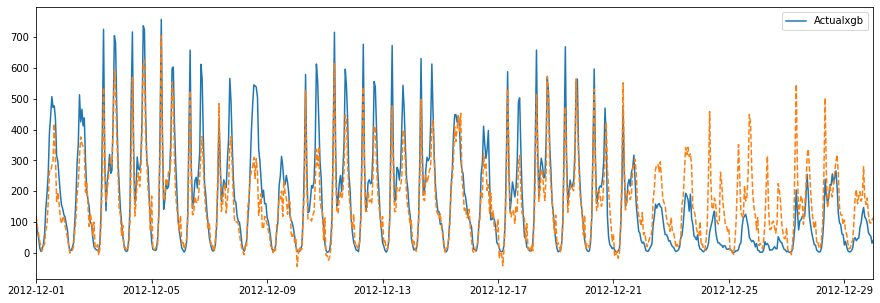

In [96]:


plt.plot(y_test.index, y_test)
plt.plot(y_test.index, test_forecast_xgb_exog, '--')
plt.xlim([pd.to_datetime('2012-12-01'), pd.to_datetime('2012-12-30')])
plt.legend(['Actual' 'xgb'])
fig = plt.gcf()
fig.set_size_inches(15 ,5)
plt.show()


# Facebook Prophet Time Series Forecasting

*Prophet is a very powerful easy to use forecasting algorithm with many paramters to tune to specific business cases. Whilst it tries to autodetect many paramters many paramters can be set for imporved performance*

Facebook Prophet is a time-series forecasting library developed by Facebook. It is designed to make it easy for analysts and developers to create accurate forecasts for a wide range of time-series data such as sales, weather, and stock prices. It is based on an additive regression model that incorporates features such as trends, seasonality, and holidays. Prophet also has built-in functionality for handling missing data and outliers. It is widely used in industries such as finance, retail, and healthcare for forecasting and decision-making purposes.

Facebook Prophet is a time series forecasting model developed by Facebook that uses a generalized additive model (GAM) to make predictions. It is similar to ARIMA in that it can model time series data with seasonality and trends. However, Prophet has some advantages over ARIMA in terms of ease of use and performance.

One advantage of Prophet is that it does not require as much domain knowledge or manual feature engineering as ARIMA, as it can automatically detect and model seasonality and trends. Additionally, Prophet is often faster to train and can handle missing data more easily than ARIMA.

That being said, ARIMA is a more traditional and widely used time series forecasting model, and may still be a better choice for certain applications or data sets. It ultimately depends on the specific needs and characteristics of the problem at hand.

In [9]:
# !pip install prophet

In [104]:
from prophet import Prophet

**Prophet requires a column with datetime format and a column with the variable we need to predict. We shall therefore use train and test the variables we used earlier on (prior to regression)**

In [105]:
train.head()

Date_Time  Count     weathersit  temp_degrees  windspeed_kph  \
0 2011-01-01 00:00:00   16.0  Partly cloudy           9.6            0.0   
1 2011-01-01 01:00:00   38.0  Partly cloudy           8.8            0.0   
2 2011-01-01 02:00:00   31.0  Partly cloudy           8.8            0.0   
3 2011-01-01 03:00:00   12.0  Partly cloudy           9.6            0.0   
4 2011-01-01 04:00:00    1.0  Partly cloudy           9.6            0.0   

   hummidity  holiday  
0       81.0      0.0  
1       80.0      0.0  
2       80.0      0.0  
3       75.0      0.0  
4       75.0      0.0

<div class="alert alert-block alert-warning">
<b>Question </b>
Reset the index of train and test since prophet needs them as a column 
<br>
</div>

**Prophet needs the date_time as a column and not an index so we shall reset the index**

In [106]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)
train.head()

index           Date_Time  Count     weathersit  temp_degrees  \
0      0 2011-01-01 00:00:00   16.0  Partly cloudy           9.6   
1      1 2011-01-01 01:00:00   38.0  Partly cloudy           8.8   
2      2 2011-01-01 02:00:00   31.0  Partly cloudy           8.8   
3      3 2011-01-01 03:00:00   12.0  Partly cloudy           9.6   
4      4 2011-01-01 04:00:00    1.0  Partly cloudy           9.6   

   windspeed_kph  hummidity  holiday  
0            0.0       81.0      0.0  
1            0.0       80.0      0.0  
2            0.0       80.0      0.0  
3            0.0       75.0      0.0  
4            0.0       75.0      0.0

<div class="alert alert-block alert-warning">
<b>Question </b>
Rename the columns for Prophet format
<br>
</div>

**NOTE : Prophet takes a dataframe as its input. It will specifically require that the date component column be caled 'ds'. It specifcally requires the target component to be called 'y'**

In [107]:
train_fb = train
train_fb = train_fb.rename(columns = {'Date_Time': 'ds', 'Count':'y'})
train_fb.head()

index                  ds     y     weathersit  temp_degrees  \
0      0 2011-01-01 00:00:00  16.0  Partly cloudy           9.6   
1      1 2011-01-01 01:00:00  38.0  Partly cloudy           8.8   
2      2 2011-01-01 02:00:00  31.0  Partly cloudy           8.8   
3      3 2011-01-01 03:00:00  12.0  Partly cloudy           9.6   
4      4 2011-01-01 04:00:00   1.0  Partly cloudy           9.6   

   windspeed_kph  hummidity  holiday  
0            0.0       81.0      0.0  
1            0.0       80.0      0.0  
2            0.0       80.0      0.0  
3            0.0       75.0      0.0  
4            0.0       75.0      0.0

In [108]:
test_fb = test
test_fb = test_fb.rename(columns = {'Date_Time': 'ds', 'Count':'y'})
test_fb.head()

index                  ds     y            weathersit  temp_degrees  \
0      0 2012-11-18 22:00:00  74.0  Mist + Broken clouds          14.4   
1      1 2012-11-18 23:00:00  59.0         Partly cloudy          14.4   
2      2 2012-11-19 00:00:00  27.0         Partly cloudy          14.4   
3      3 2012-11-19 01:00:00  19.0  Mist + Broken clouds          14.4   
4      4 2012-11-19 02:00:00   5.0  Mist + Broken clouds          14.4   

   windspeed_kph  hummidity  holiday  
0           17.0       66.0      0.0  
1           15.0       66.0      0.0  
2           15.0       66.0      0.0  
3           15.0       66.0      0.0  
4           17.0       66.0      0.0

**Initially we shall call our model m and fit our data to Prophet with no paramters. Later in this notebook we can go through these parameters**

<div class="alert alert-block alert-warning">
<b>Question </b>
Fit the model to train_fb
<br>
</div>

In [109]:
model = Prophet()
model.fit(train_fb)

10:03:03 - cmdstanpy - INFO - Chain [1] start processing
10:03:07 - cmdstanpy - INFO - Chain [1] done processing


**Once the data is fited to Prophet making a forecast is simple. Be clear to set the frequency of points at which you want your forecast. By default it may not forecast at the frequency of the data you used to train it. Use the same frequency codes you would to set any time series data in pandas. Also note to set the number of forecast periods required**

<div class="alert alert-block alert-warning">
<b>Question </b>
View and store the results
<br>
</div>

In [110]:

train_fit_fb = model.predict(train_fb)
test_forecast_fb =  model.predict(test_fb)
results = update_results('fb', 'bikes',results, train_fb.y, train_fit_fb.yhat,test_fb.y, test_forecast_fb.yhat)
results

model    data train_rmse train_mape train_r2 test_rmse  \
0                 ets  bridge    37695.5        9.0     0.89  28320.61   
0               ARIMA  bridge   39318.01       21.0     0.51  31993.91   
0              SARIMA  bridge   39925.99       15.0     0.72  26879.35   
0        SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43   
0                 ETS   bikes      87.66       83.0     0.76    118.71   
0                  LR   bikes      154.5      396.0     0.26    199.34   
0              LR-OHE   bikes     106.19      305.0     0.65    125.05   
0             xgb-OHE  energy      64.62       98.0     0.87    109.68   
0         LR-OHE-exog   bikes     102.31      303.0     0.68    114.02   
0  xgb-hypertune-exog   bikes      40.99       62.0     0.95     84.89   
0                  fb   bikes     112.49      337.0     0.61    153.07   

  test_mape test_r2  
0      12.0     0.9  
0      38.0   -1.15  
0      14.0    0.77  
0      13.0    0.84  
0     134.0    0.48  
0     952.0   -0.46  
0     273.0    0.43  
0     160.0    0.56  
0     212.0    0.52  
0     126.0    0.74  
0     451.0    0.13

**Lets now see if we can improve our forecast using an exogenous variable, in this case temp_mean**

In [111]:
train_fb.dtypes

index                     int64
ds               datetime64[ns]
y                       float64
weathersit               object
temp_degrees            float64
windspeed_kph           float64
hummidity               float64
holiday                 float64
dtype: object

In [112]:
object_cols = ['temp_degrees', 'windspeed_kph' ,'hummidity']   
for i in object_cols:
    train_fb[i] = train_fb[i].astype(int)
    test_fb[i] = test_fb[i].astype(int)


<div class="alert alert-block alert-warning">
<b>Question </b>
Add params to the prophet model. We shall add temp_degrees, hummidity windspeed and holidays. Lets also add yearly seasonality
 
<br>
</div>

In [113]:
model = Prophet()
model.add_regressor('temp_degrees')
model.add_regressor('windspeed_kph')
model.add_regressor('hummidity')
model.add_regressor('holiday')

model.add_seasonality(name='yearly', period=int(365.25 *24), fourier_order=10)
model.fit(train_fb)

10:03:15 - cmdstanpy - INFO - Chain [1] start processing
10:03:22 - cmdstanpy - INFO - Chain [1] done processing


In [114]:
train_fit_fb = model.predict(train_fb)
test_forecast_fb =  model.predict(test_fb)
results = update_results('fb-exog', 'bikes',results, train_fb.y, train_fit_fb.yhat,test_fb.y, test_forecast_fb.yhat)
results

model    data train_rmse train_mape train_r2 test_rmse  \
0                 ets  bridge    37695.5        9.0     0.89  28320.61   
0               ARIMA  bridge   39318.01       21.0     0.51  31993.91   
0              SARIMA  bridge   39925.99       15.0     0.72  26879.35   
0        SARIMA- PQ=1  bridge   39834.08       15.0     0.72  26881.43   
0                 ETS   bikes      87.66       83.0     0.76    118.71   
0                  LR   bikes      154.5      396.0     0.26    199.34   
0              LR-OHE   bikes     106.19      305.0     0.65    125.05   
0             xgb-OHE  energy      64.62       98.0     0.87    109.68   
0         LR-OHE-exog   bikes     102.31      303.0     0.68    114.02   
0  xgb-hypertune-exog   bikes      40.99       62.0     0.95     84.89   
0                  fb   bikes     112.49      337.0     0.61    153.07   
0             fb-exog   bikes     108.76      330.0     0.64    122.21   

  test_mape test_r2  
0      12.0     0.9  
0      38.0   -1.15  
0      14.0    0.77  
0      13.0    0.84  
0     134.0    0.48  
0     952.0   -0.46  
0     273.0    0.43  
0     160.0    0.56  
0     212.0    0.52  
0     126.0    0.74  
0     451.0    0.13  
0     251.0    0.45